# Import library

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # mã hóa nhãn
from nltk.corpus import stopwords # bộ từ dừng của NLTK
from nltk.stem.porter import PorterStemmer # rút gọn từ về gốc
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression # mô hình hồi quy logistic
from sklearn.neighbors import KNeighborsClassifier # thuật toán học máy có giám sát
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score # đánh giá mô hình
from sklearn.feature_extraction.text import TfidfVectorizer # chuyển văn bản thành vector số
from sklearn.model_selection import train_test_split # tách dữ liệu huấn luyện và kiểm tra
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score

import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Truc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Truc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Truc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Step 1: Data preprocessing & Feature Engineering

## Read csv file

In [2]:
# Read dataset
data = pd.read_csv("./spam_balanced.csv")
data.head

<bound method NDFrame.head of      Category                                            Message
0         ham  Do well :)all will for little time. Thing of g...
1         ham           You do got a shitload of diamonds though
2         ham                   Thank you. I like you as well...
3         ham  Hello. No news on job, they are making me wait...
4        spam  Congratulations! You've won a sony! Call now o...
...       ...                                                ...
8067      ham      Prabha..i'm soryda..realy..frm heart i'm sory
8068      ham                         Nt joking seriously i told
8069      ham            Did he just say somebody is named tampa
8070     spam  Get your mobile today! Text FY8E to 0810709751...
8071     spam  You've been selected for a free! Call 09295372...

[8072 rows x 2 columns]>

In [3]:
# Mã hóa nhãn mục tiêu
"""
Mục đích: chuyển đổi giá trị nhãn thành dạng số
- Nhãn "HAM"  => 0
- Nhãn "SPAM" => 1
"""
le = LabelEncoder()
data["Category"] = le.fit_transform(data["Category"])

In [4]:
# Data information - Thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8072 entries, 0 to 8071
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  8072 non-null   int32 
 1   Message   8072 non-null   object
dtypes: int32(1), object(1)
memory usage: 94.7+ KB


In [5]:
# Check Null Values - Kiểm tra xem dữ liệu có null không
data.isnull().sum()


Category    0
Message     0
dtype: int64

In [6]:
# Check Duplicate Values - kiểm tra xem dữ liệu có bị trùng lặp không
data.duplicated().sum()

496

In [7]:
# Drop Duplicates - loại bỏ trùng lặp
df = data.drop_duplicates(keep="first")

In [8]:
# Xem số hàng và cột trong DataFrame
df.shape


(7576, 2)

In [9]:
# Xem 5 dòng đầu tiên của DataFrame
df.head()

,Category,Message
0,0,Do well :)all will for little time. Thing of g...
1,0,You do got a shitload of diamonds though
2,0,Thank you. I like you as well...
3,0,"Hello. No news on job, they are making me wait..."
4,1,Congratulations! You've won a sony! Call now o...


In [10]:
# Ham & Spam Counts  - đếm số lượng mail spam/ham
df["Category"].value_counts()

Category
0    4516
1    3060
Name: count, dtype: int64

## Pie Chart - Biểu đồ hình tròn

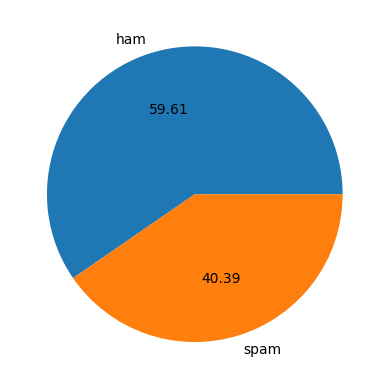

In [11]:
plt.pie(df["Category"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

## Feature Engineering - Kỹ thuật xử lý đặc trưng

In [12]:
# Tính tổng ký tự trong dữ liệu
df.loc[:, "characters"] = df["Message"].apply(len)

In [13]:
# Tính tổng từ
df.loc[:,"word"] = df["Message"].apply(lambda x:len( nltk.word_tokenize(x)))

In [14]:
# Tính tổng câu
df.loc[:,"sentence"] = df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
# Statistical Analysis of new features - thống kê các số liệu từ các trường dữ liệu mới
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,7576.000000,7576.000000,7576.000000
mean,80.249340,18.145063,2.289731
std,48.567332,11.122205,1.316313
min,2.000000,1.000000,1.000000
25%,45.000000,11.000000,1.000000
50%,76.000000,17.000000,2.000000
75%,95.000000,20.000000,3.000000
max,910.000000,220.000000,38.000000


In [16]:
# Phân tích thông tin cho dữ liệu ham
df[df["Category"]==0][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.951063,17.250664,1.827724
std,56.730031,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
# Phân tích thông tin cho dữ liệu spam
df[df["Category"]==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,3060.000000,3060.000000,3060.000000
mean,93.971895,19.465033,2.971569
std,27.837651,5.580381,0.800565
min,7.000000,2.000000,1.000000
25%,76.000000,16.000000,3.000000
50%,85.000000,18.000000,3.000000
75%,97.000000,20.000000,3.000000
max,224.000000,46.000000,9.000000


## Histogram Plot 

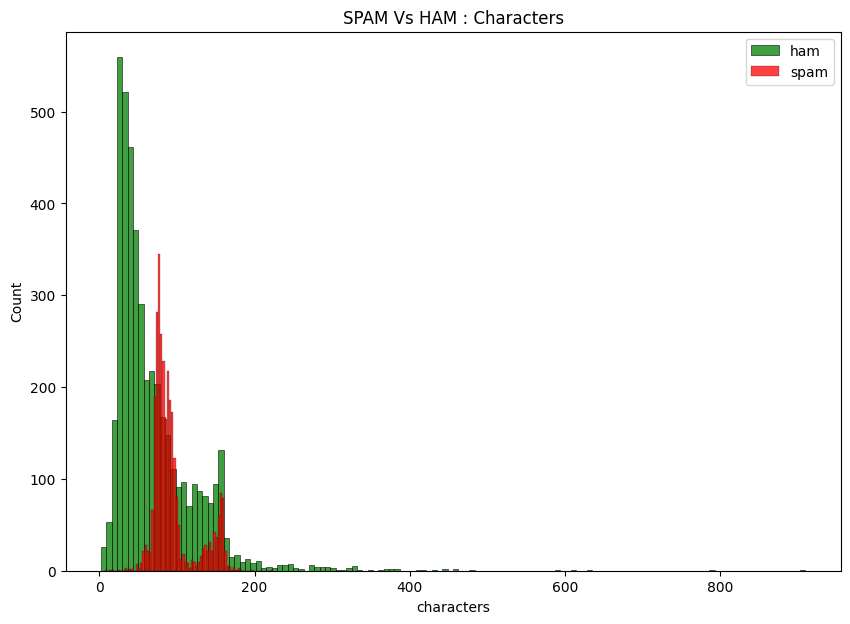

In [18]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["Category"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["Category"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

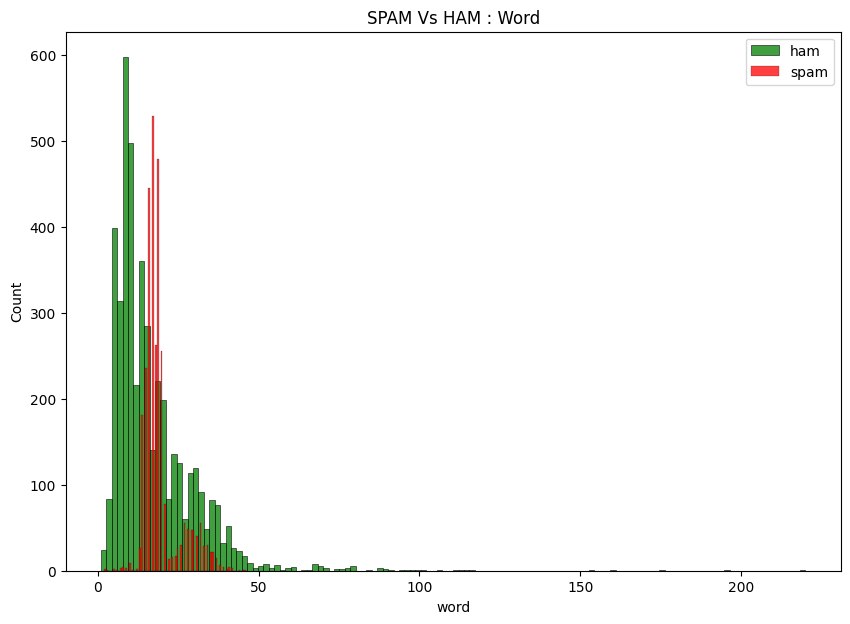

In [19]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["Category"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["Category"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

# Pair Plot - Biều đồ cặp

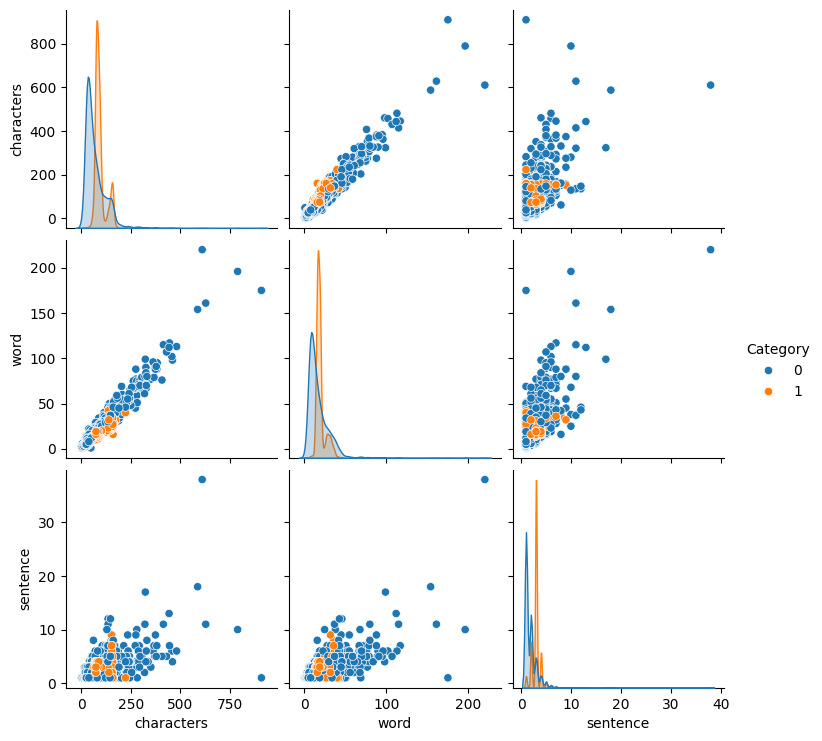

In [20]:
sns.pairplot(df,hue="Category")

## Heatmap - biều đồ trực quan hóa dữ liệu dạng ma trận


In [21]:
# Select numeric columns only  - chỉ chọn các cột có kiểu dữ liệu là số
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations between numeric features  - tính toán tương quan giữa các đặc trưng số
print(numeric_df.corr())

            Category  characters      word  sentence
Category    1.000000    0.232596  0.097698  0.426417
characters  0.232596    1.000000  0.958968  0.581045
word        0.097698    0.958968  1.000000  0.603007
sentence    0.426417    0.581045  0.603007  1.000000


<Axes: >

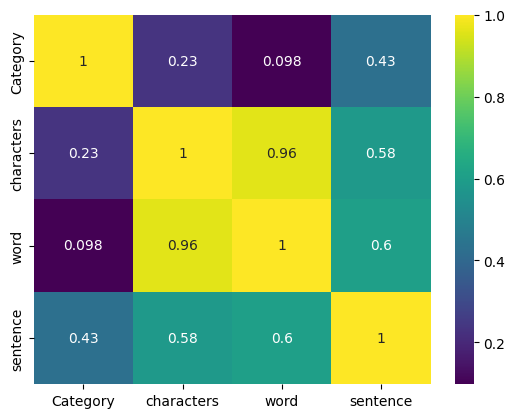

In [22]:
sns.heatmap(numeric_df.corr(),annot=True,cmap="viridis")

## Word cloud 

In [23]:
# Intilizing Porter Stemmer Class - Khởi tạo lớp Porter Stemmer
ps = PorterStemmer()

In [24]:
def data(text):
    text = text.lower()               # chuyển về chữ thường
    text = nltk.word_tokenize(text)   #  ngắt văn bản thành các từ
    
    y = []
    for i in text:
        if i.isalnum():               # loại bỏ ký tự đặc biệt
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                    # loại bỏ từ dừng và dấu câu
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    # dùng bộ phân tích Porter để loại bỏ các từ không mong muốn
        y.append(ps.stem(i))
        
    return " ".join(y)

In [25]:
# Kiểm tra dữ liệu trả về từ hàm
data("Shara ram and Shara mahakaleshawar are everything for me")

'shara ram shara mahakaleshawar everyth'

In [26]:
# lấy 2 dòng ngẫu nhiên
df.sample(2)

,Category,Message,characters,word,sentence
5693,1,Congratulations U can claim 2 VIP row A Ticket...,161,29,1
3779,0,Aiyah sorry lor... I watch tv watch until i fo...,68,16,2


In [27]:
# Áp dụng hàm data để chuyển đổi dữ liệu từ "Message" thành "new_data"
df["new_data"] = df["Message"].apply(data)

In [28]:
# Lấy 5 dòng ngẫu nhiên
df.sample(5)

,Category,Message,characters,word,sentence,new_data
1964,0,I was wondering if it would be okay for you to...,338,79,4,wonder would okay call uncl john let know thin...
1716,1,Had your mobile 10 mths? Update to latest Oran...,158,31,4,mobil 10 mth updat latest orang phone free sav...
7726,1,WINNER! Claim your voucher worth £321! Text 75...,86,17,3,winner claim voucher worth text 75nj 089683602...
516,0,I'm in class. Will holla later,30,8,2,class holla later
1379,0,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...,62,16,8,nutter cutter ctter cttergg cttargg ctargg cta...


In [29]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [30]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["Category"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["Category"] ==0]["new_data"].str.cat(sep=" "))

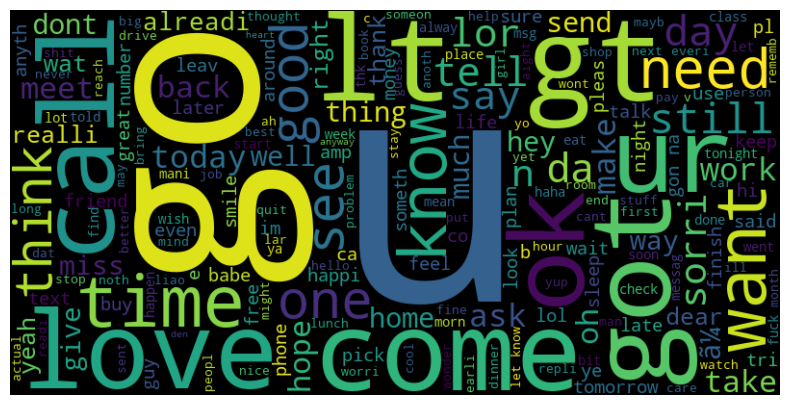

In [31]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

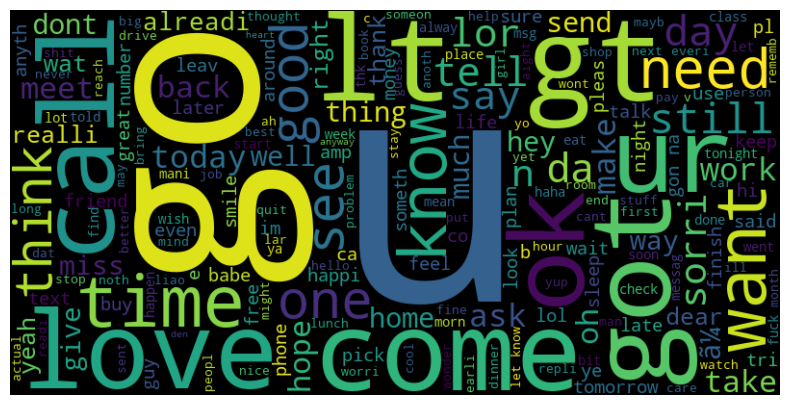

In [32]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bar Plot - Biểu đồ cột

In [33]:
# Tách các câu của email loại SPAM thành từng từ riêng lẻ
spam_corpus = []
for msg in df[df["Category"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

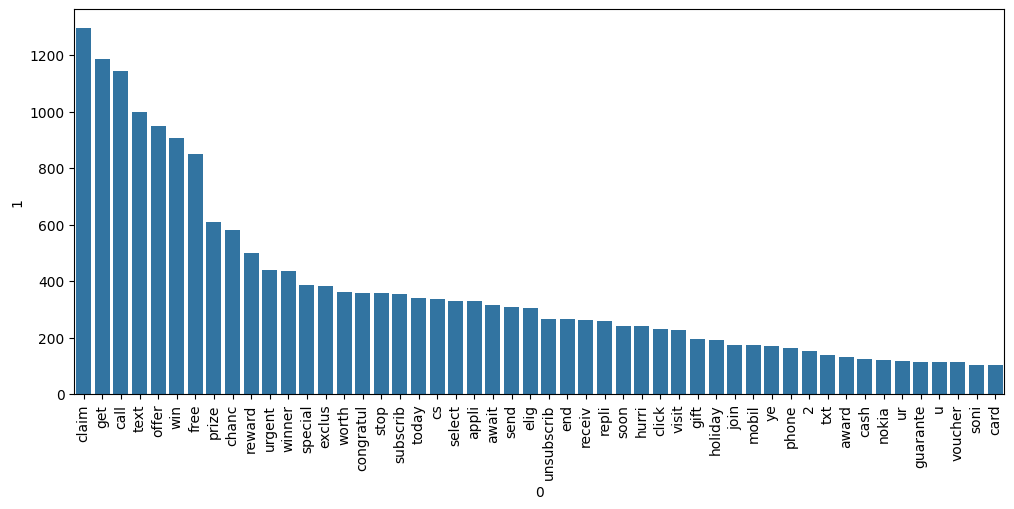

In [34]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [35]:
# Tách các câu của email loại HAM thành từng từ riêng lẻ
ham_corpus = []
for msg in df[df['Category'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

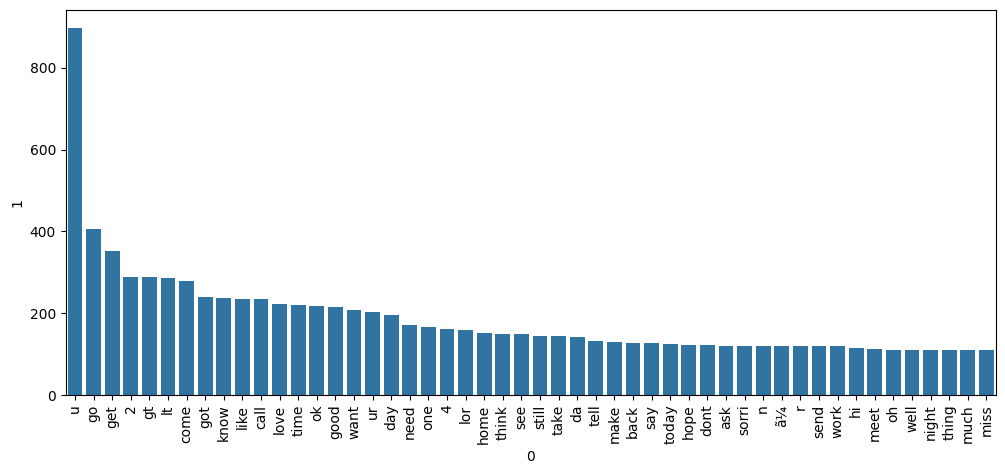

In [36]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

## Vectorization - Biểu diễn văn bản thành vector

In [37]:
# Khởi tạo bộ TF-IDF vector
tfidv = TfidfVectorizer(max_features=3000)

In [38]:
# Chuẩn bị dữ liệu
X_text = df["new_data"].astype(str).values
y = df["Category"].values

# Bước 1: Chia dữ liệu text (chưa vector hóa)
X_train_val_text, X_test_text, y_train_val, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42, stratify=y
)

# Bước 2: Chia tiếp train/val
X_train_text, X_val_text, y_train, y_val = train_test_split(
    X_train_val_text, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val
)

print("Số mẫu:", 
      "Train:", len(y_train),
      "Val:", len(y_val),
      "Test:", len(y_test))
print("Phân bố nhãn Train:", Counter(y_train))

# Bước 3: Fit TF-IDF CHỈ TRÊN TẬP TRAIN
tfidv = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')

X_train = tfidv.fit_transform(X_train_text).toarray()  # fit + transform trên train
X_val   = tfidv.transform(X_val_text).toarray()        # chỉ transform
X_test  = tfidv.transform(X_test_text).toarray()       # chỉ transform

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Số mẫu: Train: 4242 Val: 1818 Test: 1516
Phân bố nhãn Train: Counter({0: 2528, 1: 1714})
Train size: (4242, 3000)
Validation size: (1818, 3000)
Test size: (1516, 3000)


# Step 2: Model training 

In [39]:
class ManualLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=10000, lambda_=0.01, tol=1e-6, verbose=False):
        """
        Manual Logistic Regression with L2 regularization.
        
        Parameters:
        -----------
        learning_rate : float
            Tốc độ học.
        n_iterations : int
            Số vòng lặp tối đa.
        lambda_ : float
            Hệ số regularization (L2 penalty strength).
        tol : float
            Ngưỡng dừng sớm (early stopping).
        verbose : bool
            Nếu True, in loss sau mỗi 1000 vòng để theo dõi.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_ = lambda_
        self.tol = tol
        self.verbose = verbose
        self.weights = None
        self.bias = None
        self.losses = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_pred):
        """Tính log-loss có regularization L2"""
        n = len(y)
        # tránh log(0)
        y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
        loss = - (1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        reg_term = (self.lambda_ / (2 * n)) * np.sum(self.weights ** 2)
        return loss + reg_term

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iterations):
            # dự đoán
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)

            # gradient
            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error) + (self.lambda_ / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(error)

            # cập nhật
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # tính loss để theo dõi hội tụ
            loss = self._compute_loss(y, y_pred)
            self.losses.append(loss)

            # dừng sớm nếu loss thay đổi rất nhỏ
            if i > 0 and abs(self.losses[-2] - self.losses[-1]) < self.tol:
                if self.verbose:
                    print(f"Early stopping at iteration {i}")
                break

            if self.verbose and i % 1000 == 0:
                print(f"Iter {i}: Loss = {loss:.6f}")

        return self

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_predicted_probs = self.predict_proba(X)
        return np.where(y_predicted_probs >= threshold, 1, 0)

# --- Manual KNN ---
class ManualKNeighborsClassifier:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.sqrt(np.sum((x_train - x)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# --- Manual Bernoulli Naive Bayes ---
class ManualBernoulliNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha 
        self.prior_probs = None
        self.conditional_probs = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        X_binary = (X > 0).astype(int)

        self.prior_probs = np.zeros(n_classes)
        self.conditional_probs = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self._classes):
            X_c = X_binary[y == c]
            self.prior_probs[idx] = X_c.shape[0] / n_samples
            N_iC = np.sum(X_c, axis=0) 
            N_C = X_c.shape[0]
            self.conditional_probs[idx] = (N_iC + self.alpha) / (N_C + 2 * self.alpha)

    def predict(self, X):
        X_binary = (X > 0).astype(int)
        predictions = [self._predict(x) for x in X_binary]
        return np.array(predictions)

    def _predict(self, x):
        posteriors = []
        epsilon = 1e-9 
        for idx, c in enumerate(self._classes):
            prior = np.log(self.prior_probs[idx])
            prob_feature_present = self.conditional_probs[idx] 
            prob_feature_absent = 1.0 - prob_feature_present 
            
            log_likelihood = np.sum(
                x * np.log(prob_feature_present + epsilon) + 
                (1 - x) * np.log(prob_feature_absent + epsilon)
            )
            posterior = prior + log_likelihood
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]


# ===============================
# STEP 2: HUẤN LUYỆN & ĐÁNH GIÁ
# ===============================

models = {
    'Manual_BNB': ManualBernoulliNB(alpha=1.0),
    'Manual_KNN': ManualKNeighborsClassifier(n_neighbors=5),
    'Manual_LR': ManualLogisticRegression(
    learning_rate=0.1,
    lambda_=0.0001,
    n_iterations=15000,
    tol=1e-6,
    verbose=True
) 
}

results = {}
best_model = None
best_accuracy = 0.0

print("\n--- Bắt đầu Huấn luyện và Đánh giá các Mô hình Thủ công ---")

for name, model in models.items():
    print(f"\n Đang huấn luyện mô hình: {name}...")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
    
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1
    }

    print(f"[{name}] Kết quả trên Tập Test:")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)


# ===============================
# LƯU MÔ HÌNH TỐT NHẤT
# ===============================

if best_model:
    print(f" Mô hình tốt nhất ({best_model.__class__.__name__}).")


# ===============================
# IN TỔNG KẾT TẤT CẢ MÔ HÌNH
# ===============================
print("\n Tổng kết các mô hình:")
for model_name, scores in results.items():
    print(f"{model_name:<12} | Accuracy: {scores['accuracy']:.4f} | Precision: {scores['precision']:.4f} | F1-score: {scores['f1_score']:.4f}")

model_best = best_model


--- Bắt đầu Huấn luyện và Đánh giá các Mô hình Thủ công ---

 Đang huấn luyện mô hình: Manual_BNB...
[Manual_BNB] Kết quả trên Tập Test:
Accuracy : 0.9822
Precision: 1.0000
F1-Score : 0.9774
Confusion Matrix:
 [[904   0]
 [ 27 585]]

 Đang huấn luyện mô hình: Manual_KNN...
[Manual_KNN] Kết quả trên Tập Test:
Accuracy : 0.9347
Precision: 1.0000
F1-Score : 0.9120
Confusion Matrix:
 [[904   0]
 [ 99 513]]

 Đang huấn luyện mô hình: Manual_LR...
Iter 0: Loss = 0.693147
Iter 1000: Loss = 0.436692
Iter 2000: Loss = 0.333561
Iter 3000: Loss = 0.278631
Iter 4000: Loss = 0.244391
Iter 5000: Loss = 0.220636
Iter 6000: Loss = 0.202891
Iter 7000: Loss = 0.188925
Iter 8000: Loss = 0.177508
Iter 9000: Loss = 0.167912
Iter 10000: Loss = 0.159672
Iter 11000: Loss = 0.152480
Iter 12000: Loss = 0.146121
Iter 13000: Loss = 0.140439
Iter 14000: Loss = 0.135319
[Manual_LR] Kết quả trên Tập Test:
Accuracy : 0.9670
Precision: 0.9930
F1-Score : 0.9577
Confusion Matrix:
 [[900   4]
 [ 46 566]]
 Mô hình tốt nh

# Step 3: Hyper Parameter Tuning & Validate

In [40]:
# ===============================
# STEP 2B: HYPERPARAMETER TUNING
# ===============================

import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

print("\n--- BẮT ĐẦU HYPERPARAMETER TUNING ---")

best_models = {}
results_summary = []  # lưu tổng hợp tất cả mô hình
best_accuracy_overall = 0.0
best_model_overall = None

# ----- Logistic Regression -----
tuning_params = {
    'learning_rate': [0.01, 0.001],
    'n_iterations': [10000, 15000],
    'lambda_': [0.001, 0.0001]
}

print("\n Hyperparameter Tuning: Manual Logistic Regression")

best_f1_lr = 0
best_model_lr = None
best_config_lr = None

for lr in tuning_params['learning_rate']:
    for n_iter in tuning_params['n_iterations']:
        for lam in tuning_params['lambda_']:

            print(f" Huấn luyện LR với learning_rate={lr}, n_iter={n_iter}, lambda_={lam} ...")
            model = ManualLogisticRegression(
                learning_rate=lr,
                n_iterations=n_iter,
                lambda_=lam,
                tol=1e-6,
                verbose=False
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)

            acc = accuracy_score(y_val, y_pred)
            prec = precision_score(y_val, y_pred, zero_division=0)
            f1 = f1_score(y_val, y_pred, zero_division=0)

            results_summary.append({
                'Model': 'Manual_LR',
                'learning_rate': lr,
                'n_iterations': n_iter,
                'lambda_': lam,
                'accuracy': acc,
                'precision': prec,
                'f1': f1
            })

            if f1 > best_f1_lr:
                best_f1_lr = f1
                best_model_lr = model
                best_config_lr = {'learning_rate': lr, 'n_iterations': n_iter, 'lambda_': lam}

# lưu mô hình tốt nhất LR
if best_model_lr:
    best_models['Manual_LR'] = {
        'model': best_model_lr,
        'params': best_config_lr,
        'precision': precision_score(y_val, best_model_lr.predict(X_val), zero_division=0)
    }

# ----- KNN -----
print("\n Tuning: Manual KNN")
knn_neighbors = [1, 3, 5, 7, 9]

for k in knn_neighbors:
    model = ManualKNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)

    results_summary.append({
        'Model': 'Manual_KNN',
        'n_neighbors': k,
        'accuracy': accuracy,
        'precision': precision,
        'f1': f1
    })

    if accuracy > best_accuracy_overall:
        best_accuracy_overall = accuracy
        best_model_overall = model

    if 'Manual_KNN' not in best_models or precision > best_models['Manual_KNN']['precision']:
        best_models['Manual_KNN'] = {
            'model': model,
            'params': {'n_neighbors': k},
            'precision': precision
        }

# -----  Bernoulli Naive Bayes -----
print("\n Tuning: Manual BernoulliNB")
bnb_alphas = [0.1, 0.5, 1.0, 2.0]

for alpha in bnb_alphas:
    model = ManualBernoulliNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)

    results_summary.append({
        'Model': 'Manual_BNB',
        'alpha': alpha,
        'accuracy': accuracy,
        'precision': precision,
        'f1': f1
    })

    if accuracy > best_accuracy_overall:
        best_accuracy_overall = accuracy
        best_model_overall = model

    if 'Manual_BNB' not in best_models or precision > best_models['Manual_BNB']['precision']:
        best_models['Manual_BNB'] = {
            'model': model,
            'params': {'alpha': alpha},
            'precision': precision
        }

# ===============================
# ĐÁNH GIÁ MÔ HÌNH TỐT NHẤT TRÊN TEST
# ===============================

print("\n--- ĐÁNH GIÁ TRÊN TẬP TEST ---")
for model_name, model_info in best_models.items():
    model = model_info['model']
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n [{model_name}]")
    print("Best Params:", model_info['params'])
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score : {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

# ===============================
# Tổng kết Tuning
# ===============================
print("\n--- Tổng kết Tuning ---")
results_df = pd.DataFrame(results_summary)
print(results_df.sort_values(by='f1', ascending=False).head(15))


--- BẮT ĐẦU HYPERPARAMETER TUNING ---

 Hyperparameter Tuning: Manual Logistic Regression
 Huấn luyện LR với learning_rate=0.01, n_iter=10000, lambda_=0.001 ...
 Huấn luyện LR với learning_rate=0.01, n_iter=10000, lambda_=0.0001 ...
 Huấn luyện LR với learning_rate=0.01, n_iter=15000, lambda_=0.001 ...
 Huấn luyện LR với learning_rate=0.01, n_iter=15000, lambda_=0.0001 ...
 Huấn luyện LR với learning_rate=0.001, n_iter=10000, lambda_=0.001 ...
 Huấn luyện LR với learning_rate=0.001, n_iter=10000, lambda_=0.0001 ...
 Huấn luyện LR với learning_rate=0.001, n_iter=15000, lambda_=0.001 ...
 Huấn luyện LR với learning_rate=0.001, n_iter=15000, lambda_=0.0001 ...

 Tuning: Manual KNN

 Tuning: Manual BernoulliNB

--- ĐÁNH GIÁ TRÊN TẬP TEST ---

 [Manual_LR]
Best Params: {'learning_rate': 0.01, 'n_iterations': 15000, 'lambda_': 0.001}
Accuracy : 0.9215
Precision: 0.9960
F1-Score : 0.8927
Confusion Matrix:
 [[902   2]
 [117 495]]

 [Manual_KNN]
Best Params: {'n_neighbors': 3}
Accuracy : 0.944

# Lưu mô hình 

In [41]:
# Lưu mô hình
if best_model_overall:
    pickle.dump(best_model_overall, open('final_model.pkl', 'wb'))
pickle.dump(tfidv, open('tfidf_vectorizer.pkl', 'wb'))
print("\n Mô hình và TF-IDF Vectorizer đã được lưu thành công!")


 Mô hình và TF-IDF Vectorizer đã được lưu thành công!


# Step 4: Model deployment

In [42]:
best_model = best_model_overall

new_emails = [
    "Congratulations! You've been selected to receive a $1000 gift card. Click here to claim now.",  # spam
    "Limited offer! Win an iPhone 15 Pro. Enter your info to participate.",  # spam
    "Earn money fast by working from home. No experience required!",         # spam
    "Hey, just checking in to see how you're doing. Want to catch up later?",  # ham
    "Please find attached the report for last week’s meeting. Let me know your feedback.",  # ham
]

# Áp dụng hàm data cho new_emails
new_emails_processed = [data(email) for email in new_emails]

# Vector hóa new_emails bằng tfidv đã fit
X_new = tfidv.transform(new_emails_processed).toarray()

# Dự đoán
predictions = best_model.predict(X_new)

# In kết quả
for email, label in zip(new_emails, predictions):
    print(f"{email[:50]}... => {'Spam' if label == 1 else 'Ham'}")

Congratulations! You've been selected to receive a... => Spam
Limited offer! Win an iPhone 15 Pro. Enter your in... => Spam
Earn money fast by working from home. No experienc... => Ham
Hey, just checking in to see how you're doing. Wan... => Ham
Please find attached the report for last week’s me... => Ham
